# TCS Stock Price Prediction


### Import the libraries

In [1]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read data 

In [2]:
# The data is stored in the directory 'data'
path = 'D:\data/'

# Read the csv file using read_csv method of pandas
Df = pd.read_csv(path + 'TCS.csv', index_col=0)

# Convert index to datetime format
Df.index = pd.to_datetime(Df.index)

# Print the first five rows 
Df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-22,1325.000000,1338.849976,1315.880005,1333.819946,1761712
2016-06-23,1327.500000,1329.750000,1312.650024,1322.680054,1397014
2016-06-24,1282.569946,1296.599976,1257.069946,1286.969971,3766586
2016-06-27,1273.500000,1273.500000,1241.319946,1247.930054,4272566
2016-06-28,1247.930054,1251.449951,1229.199951,1231.969971,4499524


### Define the explanatory variables

In [4]:
# Create predictor variables
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low

# Store all predictor variables in a variable X
X = Df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2016-06-22,-8.819946,22.969971
2016-06-23,4.819946,17.099976
2016-06-24,-4.400025,39.530030
2016-06-27,25.569946,32.180054
2016-06-28,15.960083,22.250000


### Define the target variable

In [5]:
# Target variables
y = np.where(Df['Close'].shift(-1) > Df['Close'], 1, 0)

### Split the data into train and test

In [6]:
split_percentage = 0.8
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

### Support Vector Classifier (SVC)

In [7]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

### Classifier accuracy

In [8]:
# train and test accuracy
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 53.56%
Test Accuracy: 51.38%


### Strategy implementation

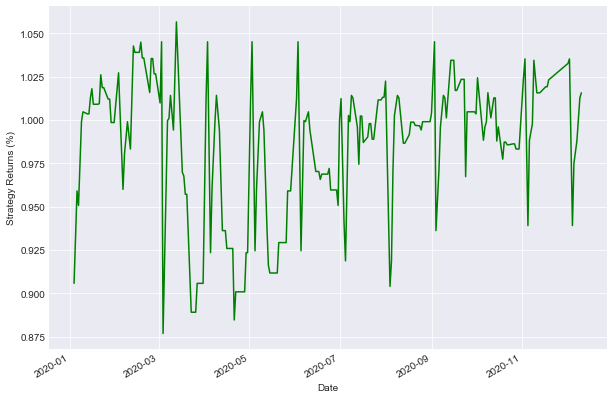

In [9]:
# Predicted Signal
Df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
Df['Return'] = Df.Close.pct_change()

# Calculate strategy returns
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal.shift(1)

# Calculate geometric returns
geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()

# Plot geometric returns
geometric_returns.plot(figsize=(10, 7),color='g')
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()